In [1]:
#Mackey-Glass dataset
from scipy.io import loadmat
train = loadmat(r'D:\train_tau_30.mat')

In [2]:
train = train.get('X1')

In [3]:
import numpy as np
l1 = np.zeros((train.shape[0]-10,10))
l2=[]
for i in range(len(l1)):
  for j in range(0,10):
    l1[i][j]=train[j+i]
  l2.append(train[i+10])

In [4]:
x = l1
y = np.array(l2)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
x_train = np.reshape(x_train,(792,10,1))
x_test = np.reshape(x_test,(198,10,1))
x = np.reshape(x,(990,10,1))

In [9]:
import keras
from keras.callbacks import EarlyStopping
#keras.activations
import tensorflow as tf
def my_leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.01)


# MEE

In [10]:
from keras import backend as K

def mee(y_true,y_pred):
   sigma=0.1
   error = tf.cast(y_true,'float32')-tf.cast(y_pred,'float32')
   error=K.repeat(error, K.shape(error)[0])
   pi=tf.cast(np.pi,'float32')
   var=(1/(K.sqrt(2*pi)*sigma))*K.exp(-error**2/(2*(sigma**2)))
   loss = -K.log(K.mean(var*var))
   return loss


In [12]:
my_callbacks = EarlyStopping(monitor='val_loss',patience=15)

In [14]:
from numpy import array
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
model1 = Sequential()
model1.add(Conv1D( filters=128, kernel_size=10, activation='relu', input_shape=(10,1)))
model1.add(MaxPooling1D(pool_size=2,padding='same'))
model1.add(Flatten())
model1.add(Dense(32, activation='tanh'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss=mee,metrics=['mean_absolute_percentage_error'])
print(model1.summary())

history = model1.fit(x_train, y_train, epochs=150,verbose=1,validation_split=0.2,validation_data=(x_test,y_test),callbacks=[my_callbacks])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 1, 128)            1408      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________
None
Train on 792 samples, validate on 198 samples
Epoch 1/150
792/792 [==============================] - 1s 633us/ste

792/792 [==============================] - 0s 83us/step - loss: -2.7668 - mean_absolute_percentage_error: 0.4977 - val_loss: -2.7669 - val_mean_absolute_percentage_error: 0.5174
Epoch 39/150
792/792 [==============================] - 0s 76us/step - loss: -2.7669 - mean_absolute_percentage_error: 0.4751 - val_loss: -2.7669 - val_mean_absolute_percentage_error: 0.5559
Epoch 40/150
792/792 [==============================] - 0s 81us/step - loss: -2.7665 - mean_absolute_percentage_error: 0.6066 - val_loss: -2.7667 - val_mean_absolute_percentage_error: 0.5043
Epoch 41/150
792/792 [==============================] - 0s 77us/step - loss: -2.7664 - mean_absolute_percentage_error: 0.5840 - val_loss: -2.7664 - val_mean_absolute_percentage_error: 0.5640
Epoch 42/150
792/792 [==============================] - 0s 72us/step - loss: -2.7669 - mean_absolute_percentage_error: 0.4918 - val_loss: -2.7671 - val_mean_absolute_percentage_error: 0.4386
Epoch 43/150
792/792 [==============================] - 0s

Epoch 81/150
792/792 [==============================] - 0s 83us/step - loss: -2.7666 - mean_absolute_percentage_error: 0.4849 - val_loss: -2.7669 - val_mean_absolute_percentage_error: 0.4252
Epoch 82/150
792/792 [==============================] - 0s 82us/step - loss: -2.7669 - mean_absolute_percentage_error: 0.4213 - val_loss: -2.7671 - val_mean_absolute_percentage_error: 0.3743
Epoch 83/150
792/792 [==============================] - 0s 77us/step - loss: -2.7668 - mean_absolute_percentage_error: 0.4450 - val_loss: -2.7672 - val_mean_absolute_percentage_error: 0.3723
Epoch 84/150
792/792 [==============================] - 0s 82us/step - loss: -2.7671 - mean_absolute_percentage_error: 0.3745 - val_loss: -2.7670 - val_mean_absolute_percentage_error: 0.3888
Epoch 85/150
792/792 [==============================] - 0s 87us/step - loss: -2.7664 - mean_absolute_percentage_error: 0.5750 - val_loss: -2.7652 - val_mean_absolute_percentage_error: 0.7965
Epoch 86/150
792/792 [=======================

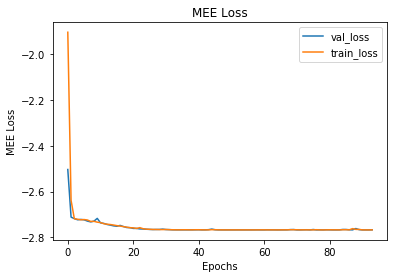

In [17]:
import matplotlib.pyplot as plt

mee_loss = history.history['val_loss']
L = history.history['loss']
plt.plot(mee_loss)
plt.plot(L)
plt.xlabel('Epochs')
plt.ylabel('MEE Loss')
plt.legend(['val_loss','train_loss'])
plt.title('MEE Loss');

# MAE loss for prediction using MEE cost function

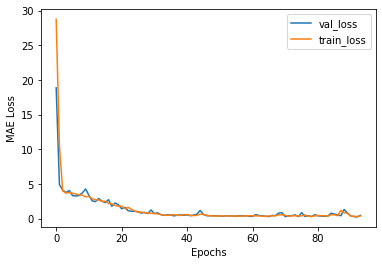

In [20]:
mae_loss = history.history['val_mean_absolute_percentage_error']
L1 = history.history['mean_absolute_percentage_error']
plt.plot(mae_loss)
plt.plot(L1)
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend(['val_loss','train_loss']);


# Predict

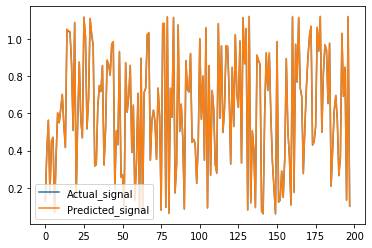

In [22]:
pred = model1.predict(x_test)
pred_whole = model1.predict(x)
plt.plot(y_test)
plt.plot(pred)
plt.legend(['Actual_signal','Predicted_signal']);

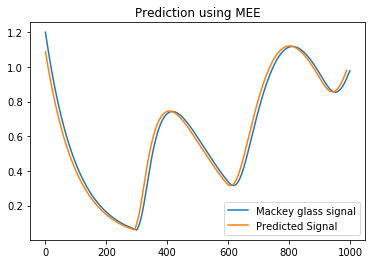

In [23]:
plt.plot(train)
plt.plot(pred_whole)
plt.legend(['Mackey glass signal','Predicted Signal'])
plt.title('Prediction using MEE');

# Using Mean squared error

### Model architecture

In [26]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
model2 = Sequential()
model2.add(Conv1D( filters=64, kernel_size=10, activation='relu', input_shape=(10,1)))
model2.add(MaxPooling1D(pool_size=2,padding='same'))
model2.add(Flatten())
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse',metrics=['mean_absolute_percentage_error'])
print(model2.summary())
history2 = model2.fit(x_train, y_train, epochs=200,verbose=1,validation_split=0.2,validation_data=(x_test,y_test),callbacks=[my_callbacks])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 1, 64)             704       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________
None
Train on 792 samples, validate on 198 samples
Epoch 1/200
792/792 [==============================] - 0s 409us/ste

792/792 [==============================] - 0s 46us/step - loss: 3.4165e-04 - mean_absolute_percentage_error: 3.0916 - val_loss: 3.5275e-04 - val_mean_absolute_percentage_error: 3.4215
Epoch 38/200
792/792 [==============================] - 0s 48us/step - loss: 3.3404e-04 - mean_absolute_percentage_error: 3.0825 - val_loss: 3.3998e-04 - val_mean_absolute_percentage_error: 3.3328
Epoch 39/200
792/792 [==============================] - 0s 49us/step - loss: 3.2949e-04 - mean_absolute_percentage_error: 3.0721 - val_loss: 3.4539e-04 - val_mean_absolute_percentage_error: 3.3597
Epoch 40/200
792/792 [==============================] - 0s 48us/step - loss: 3.2658e-04 - mean_absolute_percentage_error: 3.1388 - val_loss: 3.2335e-04 - val_mean_absolute_percentage_error: 2.9389
Epoch 41/200
792/792 [==============================] - 0s 48us/step - loss: 3.3333e-04 - mean_absolute_percentage_error: 3.0849 - val_loss: 3.2416e-04 - val_mean_absolute_percentage_error: 2.8522
Epoch 42/200
792/792 [======

Epoch 79/200
792/792 [==============================] - 0s 49us/step - loss: 3.5630e-05 - mean_absolute_percentage_error: 1.1767 - val_loss: 3.4015e-05 - val_mean_absolute_percentage_error: 1.1235
Epoch 80/200
792/792 [==============================] - 0s 48us/step - loss: 3.2070e-05 - mean_absolute_percentage_error: 1.1028 - val_loss: 3.2956e-05 - val_mean_absolute_percentage_error: 1.1708
Epoch 81/200
792/792 [==============================] - 0s 52us/step - loss: 3.2322e-05 - mean_absolute_percentage_error: 1.0439 - val_loss: 2.8254e-05 - val_mean_absolute_percentage_error: 1.0522
Epoch 82/200
792/792 [==============================] - 0s 49us/step - loss: 2.5635e-05 - mean_absolute_percentage_error: 1.0233 - val_loss: 2.5095e-05 - val_mean_absolute_percentage_error: 0.9577
Epoch 83/200
792/792 [==============================] - 0s 55us/step - loss: 2.4449e-05 - mean_absolute_percentage_error: 0.9053 - val_loss: 2.2664e-05 - val_mean_absolute_percentage_error: 0.9969
Epoch 84/200
79

792/792 [==============================] - 0s 50us/step - loss: 1.6107e-06 - mean_absolute_percentage_error: 0.2974 - val_loss: 1.4881e-06 - val_mean_absolute_percentage_error: 0.3352
Epoch 121/200
792/792 [==============================] - 0s 49us/step - loss: 1.9124e-06 - mean_absolute_percentage_error: 0.3154 - val_loss: 3.2002e-06 - val_mean_absolute_percentage_error: 0.4197
Epoch 122/200
792/792 [==============================] - 0s 48us/step - loss: 1.5329e-06 - mean_absolute_percentage_error: 0.2953 - val_loss: 1.5004e-06 - val_mean_absolute_percentage_error: 0.3434
Epoch 123/200
792/792 [==============================] - 0s 47us/step - loss: 1.3955e-06 - mean_absolute_percentage_error: 0.2888 - val_loss: 1.5174e-06 - val_mean_absolute_percentage_error: 0.3266
Epoch 124/200
792/792 [==============================] - 0s 49us/step - loss: 1.4542e-06 - mean_absolute_percentage_error: 0.2861 - val_loss: 2.3948e-06 - val_mean_absolute_percentage_error: 0.3232
Epoch 125/200
792/792 [=

792/792 [==============================] - 0s 51us/step - loss: 1.5704e-06 - mean_absolute_percentage_error: 0.2601 - val_loss: 1.2382e-05 - val_mean_absolute_percentage_error: 0.5640
Epoch 162/200
792/792 [==============================] - 0s 49us/step - loss: 7.2000e-06 - mean_absolute_percentage_error: 0.4604 - val_loss: 1.0088e-05 - val_mean_absolute_percentage_error: 0.6624
Epoch 163/200
792/792 [==============================] - 0s 52us/step - loss: 6.3296e-06 - mean_absolute_percentage_error: 0.4780 - val_loss: 2.6497e-06 - val_mean_absolute_percentage_error: 0.3137
Epoch 164/200
792/792 [==============================] - 0s 53us/step - loss: 1.8648e-06 - mean_absolute_percentage_error: 0.2862 - val_loss: 8.4378e-07 - val_mean_absolute_percentage_error: 0.2084
Epoch 165/200
792/792 [==============================] - 0s 52us/step - loss: 1.2000e-06 - mean_absolute_percentage_error: 0.2518 - val_loss: 1.3913e-06 - val_mean_absolute_percentage_error: 0.2472
Epoch 166/200
792/792 [=

In [28]:
pred = model2.predict(x_test)
whole_pred = model2.predict(x)

# MSE Loss curve

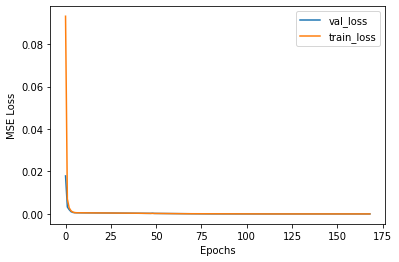

In [29]:
import matplotlib.pyplot as plt

mse_loss = history2.history['val_loss']
L3 = history2.history['loss']
plt.plot(mse_loss)
plt.plot(L3)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['val_loss','train_loss']);

# MAE loss for prediction using MSE cost function 

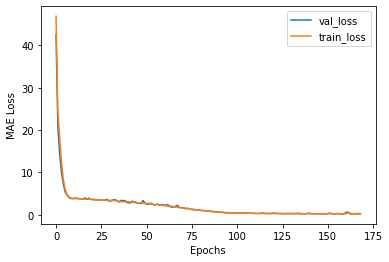

In [30]:
mae_loss = history2.history['val_mean_absolute_percentage_error']
L4 = history2.history['mean_absolute_percentage_error']
plt.plot(mae_loss)
plt.plot(L4)
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend(['val_loss','train_loss']);

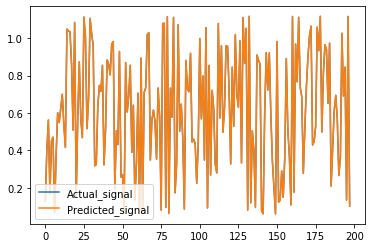

In [31]:
plt.plot(y_test)
plt.plot(pred)
plt.legend(['Actual_signal','Predicted_signal'])

# Prediction using MSE

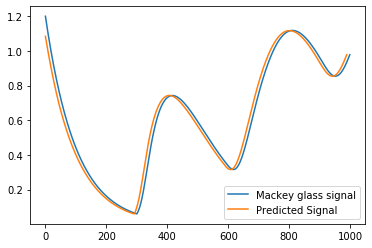

In [32]:
plt.plot(train)
plt.plot(whole_pred)
plt.legend(['Mackey glass signal','Predicted Signal'])

# With Noise

In [34]:
V=0.95*(np.random.normal(0,0.5,1000))+0.05*(np.random.normal(1,0.5,1000))
V=np.reshape(V,(1000,1))
x_n = V+train


# Model with Gaussian Noise

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [36]:
scaler = MinMaxScaler()
x_n1 = scaler.fit_transform(x_n)

In [37]:
x_noise = np.zeros((x_n1.shape[0]-10,10))
y_noise=[]
for i in range(len(x_noise)):
  for j in range(0,10):
    x_noise[i][j]=x_n1[j+i]
  y_noise.append(x_n1[i+10])

In [38]:
xnoise_train,xnoise_test,ynoise_train,ynoise_test=train_test_split(x_noise,y_noise,test_size=0.2,random_state=42)

In [40]:
xnoise_train=np.reshape(xnoise_train,(792,10,1))
ynoise_train = np.array(ynoise_train)
ynoise_test = np.array(ynoise_test)
xnoise_test = np.reshape(xnoise_test,(198,10,1))
x_noise = x_noise.reshape(990,10,1)

# Mean absolute error (Used as a metric)

In [42]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D,Dropout
model3= Sequential()
model3.add(Conv1D(filters=128, kernel_size=10, activation='relu', input_shape=(10,1)))
model3.add(MaxPooling1D(pool_size=2,padding='same'))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss=mee,metrics=['mean_absolute_percentage_error'])
print(model3.summary())
history3 = model3.fit(xnoise_train, ynoise_train, epochs=150,verbose=1,validation_split=0.2,validation_data=(xnoise_test,ynoise_test),callbacks=[my_callbacks])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 1, 128)            1408      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
None
Train on 792 samples, validate on 198 samples
Epoch 1/150
792/792 [==============================] - 1s 690us/s

In [43]:
pred_noise = model3.predict(xnoise_test)
pred_whole = model3.predict(x_noise)

# MEE Loss for noisy data

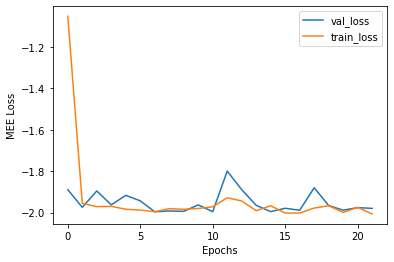

In [46]:
import matplotlib.pyplot as plt

mee_loss = history3.history['val_loss']
L5 = history3.history['loss']
plt.plot(mee_loss)
plt.plot(L5)
plt.xlabel('Epochs')
plt.ylabel('MEE Loss')
plt.legend(['val_loss','train_loss']);


# MAE loss for prediction using MAE for noisy data

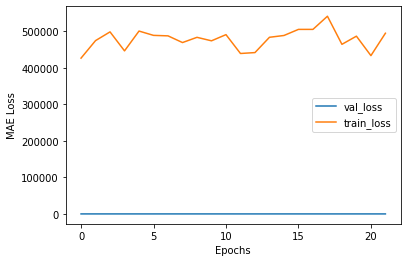

In [48]:
mae_loss = history3.history['val_mean_absolute_percentage_error']
L6 = history3.history['mean_absolute_percentage_error']
plt.plot(mae_loss)
plt.plot(L6)
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend(['val_loss','train_loss']);

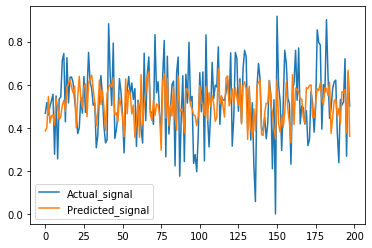

In [49]:
plt.plot(ynoise_test)
plt.plot(pred_noise)
plt.legend(['Actual_signal','Predicted_signal'])

# Prediction using MEE for noisy data

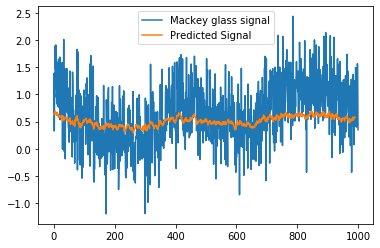

In [50]:
plt.plot(x_n)
plt.plot(pred_whole)
plt.legend(['Mackey glass signal','Predicted Signal']);

# MSE (With noise)

In [52]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D,Dropout
model4= Sequential()
model4.add(Conv1D(filters=128, kernel_size=10, activation='relu', input_shape=(10,1)))
model4.add(MaxPooling1D(pool_size=2,padding='same'))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse',metrics=['mean_absolute_percentage_error'])
print(model4.summary())
history4 = model4.fit(xnoise_train, ynoise_train, epochs=150,verbose=1,validation_split=0.2,validation_data=(xnoise_test,ynoise_test),callbacks=[my_callbacks])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 1, 128)            1408      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 1, 128)            0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 18,049
Trainable params: 18,049
Non-trainable params: 0
_________________________________________________________________
None
Train on 792 samples, validate on 198 samples
Epoch 1/150
792/792 [==============================] - 0s 570us/

In [53]:
pred_noise = model4.predict(xnoise_test)
pred_whole = model4.predict(x_noise)

# MSE Loss for noisy data

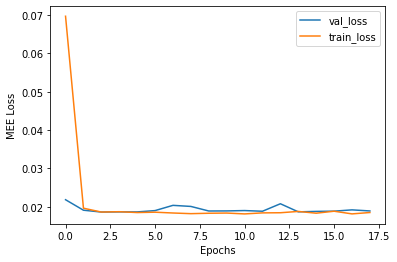

In [54]:
import matplotlib.pyplot as plt

mee_loss = history4.history['val_loss']
losss = history4.history['loss']
plt.plot(mee_loss)
plt.plot(losss)
plt.xlabel('Epochs')
plt.ylabel('MEE Loss')
plt.legend(['val_loss','train_loss']);

# MAE loss for prediction using MSE for noisy data

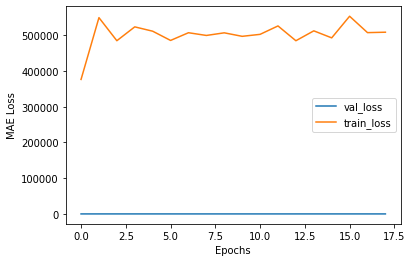

In [57]:
mae_loss = history4.history['val_mean_absolute_percentage_error']
L7 = history4.history['mean_absolute_percentage_error']
plt.plot(mae_loss)
plt.plot(L7)
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.legend(['val_loss','train_loss']);

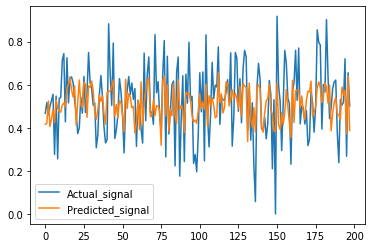

In [58]:
plt.plot(ynoise_test)
plt.plot(pred_noise)
plt.legend(['Actual_signal','Predicted_signal'])

# Prediction using MSE for noisy data

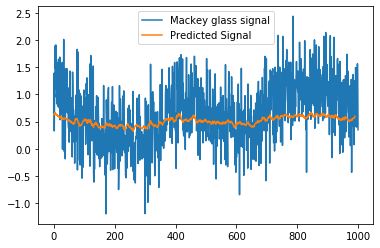

In [59]:
plt.plot(x_n)
plt.plot(pred_whole)
plt.legend(['Mackey glass signal','Predicted Signal']);

# Test data

In [78]:
#Mackey-Glass dataset
from scipy.io import loadmat
test = loadmat(r'D:\test_tau_30.mat')

In [79]:
test1=test.get('Y1')

In [80]:
type(test1)

numpy.ndarray

In [81]:
import numpy as np
l1 = np.zeros((test1.shape[0]-10,10))
l2=[]
for i in range(len(l1)):
  for j in range(0,10):
    l1[i][j]=test1[j+i]
  l2.append(test1[i+10])

In [82]:
X_test = l1
Y_test = np.array(l2)

In [84]:
X_test.shape

(990, 10)

In [85]:
X_test = np.reshape(X_test,(990,10,1))

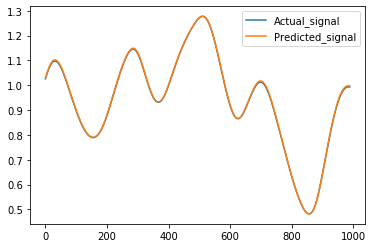

In [86]:
pred = model1.predict(X_test)
#pred_whole = model1.predict(x)
plt.plot(Y_test)
plt.plot(pred)
plt.legend(['Actual_signal','Predicted_signal']);

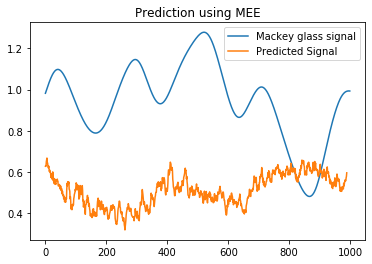

In [88]:
plt.plot(test1)
plt.plot(pred_whole)
plt.legend(['Mackey glass signal','Predicted Signal'])
plt.title('Prediction using MEE');

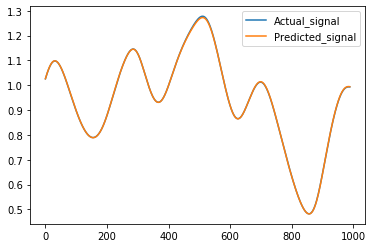

In [89]:
pred = model2.predict(X_test)
#whole_pred = model2.predict(x)
plt.plot(Y_test)
plt.plot(pred)
plt.legend(['Actual_signal','Predicted_signal'])

# With Noise

In [91]:
V1=0.95*(np.random.normal(0,0.5,1000))+0.05*(np.random.normal(1,0.5,1000))
V1=np.reshape(V1,(1000,1))
x_n = V1+test1
scaler = MinMaxScaler()
x_n1 = scaler.fit_transform(x_n)

In [92]:
x_noise = np.zeros((x_n1.shape[0]-10,10))
y_noise=[]
for i in range(len(x_noise)):
  for j in range(0,10):
    x_noise[i][j]=x_n1[j+i]
  y_noise.append(x_n1[i+10])

In [93]:
#Xnoise_train=np.reshape(xnoise_train,(792,10,1))
#Ynoise_train = np.array(ynoise_train)
Ynoise_test = np.array(ynoise_test)
Xnoise_test = np.reshape(xnoise_test,(198,10,1))
#X_noise = x_noise.reshape(990,10,1)

In [94]:
pred_noise = model3.predict(Xnoise_test)
#pred_whole = model3.predict(x_noise)

# I've used MEE for comparison

# It is evident from the graphs that MEE outperforms MSE. The MEE gives us a better accuracy (mean absolute squared value) which is less in terms of MEE as compared to MSE. The training accuracy is better than the MSE cost function